https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification

In [ ]:
import torch
from torch import nn
torch.__version__

'2.0.1+cu118'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!nvidia-smi

Sun Jun 25 09:02:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive
!pwd

/content/drive/MyDrive
/content/drive/MyDrive


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prabritbandyopadhyay","key":"b879c56592b6db76a5b3e5c4583161a7"}'}

In [ ]:
!rm -r ~/.kaggle
print("Old kaggle folder deleted")
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/
print("kaggle folder created")

Old kaggle folder deleted
kaggle folder created


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
!kaggle datasets download -d mahmoudreda55/satellite-image-classification

 23% 5.00M/21.8M [00:00<00:00, 43.2MB/s]
100% 21.8M/21.8M [00:00<00:00, 116MB/s] 


In [ ]:
!ls

 220108994.pdf
'[Aerospace Series] Ajoy Kumar Kundu, Mark A Price, David Riordan - Conceptual Aircraft Design_ An Industrial Approach (2019, Wiley) - libgen.lc.pdf'
'A Recurrent Latent Variable Model for Sequential Data.gslides'
'A Recurrent Variational Autoencoder for Speech Enhancement.gslides'
'A RECURRENT VARIATIONAL AUTOENCODER FOR SPEECH ENHANCEMENT Simon Leglaive1,2 Xavier Alameda-Pineda2 Laurent Girin2,3 Radu Horaud2.gslides'
 Autoencoder.gslides
 cifar_tpu
 code.rar
'Colab Notebooks'
 crti
'damage aircraft'
 deep
 delhi_sreya
 DSC_80421.jpg
 F0000CH1.CSV
 food101
 IED_DATASHEET.gsheet
 IISC
 intel
 INTERNAL.gsheet
 kaggle.json
'Kundu, Ajoy Kumar - Aircraft Design (2010, Cambridge University Press) - libgen.lc.pdf'
'Machine Learning.gsheet'
 m.tech.jpg
 New_projectstaff_filledup_data.xlsx
'Nonlinear Dynamics and Control of a Damaged Asymmetric Aircraft_oct.gslides'
'Nonlinear Dynamics and Control of a Damaged Asymmetric.pptx'
 OBJ_lite
'PESQ and ESTOI.gsheet'
'Prabrit Bandyopad

In [ ]:
!mkdir sat_img

In [ ]:
%cd sat_img

/content/drive/MyDrive/sat_img


In [ ]:
!pwd

/content/drive/MyDrive/sat_img


In [ ]:
%cd ..

/content/drive/MyDrive


In [ ]:
%mkdir ./sat_img/all

In [ ]:
! unzip satellite-image-classification.zip -d ./sat_img/

Streaming output truncated to the last 5000 lines.
  inflating: ./sat_img/data/cloudy/train_23566.jpg  
  inflating: ./sat_img/data/cloudy/train_23598.jpg  
  inflating: ./sat_img/data/cloudy/train_23608.jpg  
  inflating: ./sat_img/data/cloudy/train_23634.jpg  
  inflating: ./sat_img/data/cloudy/train_23636.jpg  
  inflating: ./sat_img/data/cloudy/train_23646.jpg  
  inflating: ./sat_img/data/cloudy/train_2366.jpg  
  inflating: ./sat_img/data/cloudy/train_23664.jpg  
  inflating: ./sat_img/data/cloudy/train_23706.jpg  
  inflating: ./sat_img/data/cloudy/train_2380.jpg  
  inflating: ./sat_img/data/cloudy/train_23805.jpg  
  inflating: ./sat_img/data/cloudy/train_23806.jpg  
  inflating: ./sat_img/data/cloudy/train_23826.jpg  
  inflating: ./sat_img/data/cloudy/train_23843.jpg  
  inflating: ./sat_img/data/cloudy/train_23877.jpg  
  inflating: ./sat_img/data/cloudy/train_23884.jpg  
  inflating: ./sat_img/data/cloudy/train_23953.jpg  
  inflating: ./sat_img/data/cloudy/train_2396.jpg 

In [ ]:
sat_path ="/content/drive/MyDrive/sat_img/"

In [ ]:
import os
def walk_through_dir(dir_path):

  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are{len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [ ]:
walk_through_dir(sat_path)

there are4 directories and 0 images in '/content/drive/MyDrive/sat_img/'
there are4 directories and 0 images in '/content/drive/MyDrive/sat_img/data'
there are0 directories and 1500 images in '/content/drive/MyDrive/sat_img/data/cloudy'
there are0 directories and 1131 images in '/content/drive/MyDrive/sat_img/data/desert'
there are0 directories and 1500 images in '/content/drive/MyDrive/sat_img/data/green_area'
there are0 directories and 1500 images in '/content/drive/MyDrive/sat_img/data/water'
there are4 directories and 0 images in '/content/drive/MyDrive/sat_img/train'
there are0 directories and 991 images in '/content/drive/MyDrive/sat_img/train/cloudy'
there are0 directories and 713 images in '/content/drive/MyDrive/sat_img/train/desert'
there are0 directories and 950 images in '/content/drive/MyDrive/sat_img/train/green_area'
there are0 directories and 969 images in '/content/drive/MyDrive/sat_img/train/water'
there are4 directories and 0 images in '/content/drive/MyDrive/sat_img

In [ ]:
import os
import shutil
import random

def distribute_files(source_dir, dest_dirs, ratios):
    # Iterate over the files and folders in the source directory
    for item in os.listdir(source_dir):
        item_path = os.path.join(source_dir, item)

        # If it's a file, distribute it to the destination directories
        if os.path.isfile(item_path):
          for dest_dir, ratio in dest_dirs.items():
              if random.random() < ratio:
                  if not os.path.exists(dest_dir):
                      os.makedirs(dest_dir)
                  dest_path = os.path.join(dest_dir, item)
                  if not os.path.exists(dest_path):  # Check if the file doesn't already exist
                      shutil.copy2(item_path, dest_path)

        # If it's a folder, recursively call the function to distribute its contents
        elif os.path.isdir(item_path):
            folder_name = os.path.basename(item_path)
            if folder_name in dest_dirs:
                distribute_files(item_path, dest_dirs[folder_name], ratios)

# Path to the main folder
main_folder = '/content/drive/MyDrive/sat_img/data'

# Path to the new folders
train_folder = '/content/drive/MyDrive/sat_img/train'
test_folder = '/content/drive/MyDrive/sat_img/test'
validation_folder = '/content/drive/MyDrive/sat_img/validation'

# Ratios for train, test, and validation (60:30:10)
train_ratio = 0.65
test_ratio = 0.3
validation_ratio = 0.05

# Create the new folders
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)

# Create the destination directories with their respective ratios
dest_dirs = {
    'cloudy': {
        os.path.join(train_folder, 'cloudy'): train_ratio,
        os.path.join(test_folder, 'cloudy'): test_ratio,
        os.path.join(validation_folder, 'cloudy'): validation_ratio,
    },
    'desert': {
        os.path.join(train_folder, 'desert'): train_ratio,
        os.path.join(test_folder, 'desert'): test_ratio,
        os.path.join(validation_folder, 'desert'): validation_ratio,
    },
    'green_area': {
        os.path.join(train_folder, 'green_area'): train_ratio,
        os.path.join(test_folder, 'green_area'): test_ratio,
        os.path.join(validation_folder, 'green_area'): validation_ratio,
    },
    'water': {
        os.path.join(train_folder, 'water'): train_ratio,
        os.path.join(test_folder, 'water'): test_ratio,
        os.path.join(validation_folder, 'water'): validation_ratio,
    },
}

# Distribute the files from the main folder to the respective folders
distribute_files(main_folder, dest_dirs, (train_ratio, test_ratio, validation_ratio))


In [ ]:
!ls /content/drive/MyDrive/sat_img/train/water

SeaLake_1006.jpg  SeaLake_175.jpg   SeaLake_2616.jpg  SeaLake_650.jpg
SeaLake_1012.jpg  SeaLake_1763.jpg  SeaLake_2617.jpg  SeaLake_651.jpg
SeaLake_1018.jpg  SeaLake_1766.jpg  SeaLake_2618.jpg  SeaLake_652.jpg
SeaLake_101.jpg   SeaLake_1769.jpg  SeaLake_2619.jpg  SeaLake_653.jpg
SeaLake_1027.jpg  SeaLake_1770.jpg  SeaLake_2623.jpg  SeaLake_655.jpg
SeaLake_1032.jpg  SeaLake_1772.jpg  SeaLake_2624.jpg  SeaLake_656.jpg
SeaLake_1033.jpg  SeaLake_1774.jpg  SeaLake_2628.jpg  SeaLake_657.jpg
SeaLake_1034.jpg  SeaLake_1777.jpg  SeaLake_2635.jpg  SeaLake_658.jpg
SeaLake_1038.jpg  SeaLake_1782.jpg  SeaLake_2638.jpg  SeaLake_659.jpg
SeaLake_1046.jpg  SeaLake_1786.jpg  SeaLake_2641.jpg  SeaLake_65.jpg
SeaLake_1048.jpg  SeaLake_1788.jpg  SeaLake_2642.jpg  SeaLake_661.jpg
SeaLake_1053.jpg  SeaLake_179.jpg   SeaLake_2643.jpg  SeaLake_664.jpg
SeaLake_1054.jpg  SeaLake_1800.jpg  SeaLake_2645.jpg  SeaLake_665.jpg
SeaLake_1059.jpg  SeaLake_1802.jpg  SeaLake_2647.jpg  SeaLake_667.jpg
SeaLake_1060.jpg  Sea

In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
!rm -r /content/drive/MyDrive/sat_img/

In [ ]:
sat_path="/content/drive/MyDrive/sat_img/"

In [ ]:
walk_through_dir(sat_path)

In [ ]:
!rm -r /content/drive/MyDrive/sat_img

In [ ]:
image_path = "/content/drive/MyDrive/sat_img/"

In [ ]:
train_dir = image_path + "train"
test_dir = image_path +"test"
val_dir = image_path + "validation"
print(train_dir, test_dir)

/content/drive/MyDrive/sat_img/train /content/drive/MyDrive/sat_img/test


[PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10021.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10043.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10070.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10081.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10096.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_101.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10128.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10166.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10173.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10177.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10201.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10224.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloudy/train_10225.jpg'), PosixPath('/content/drive/MyDrive/sat_img/data/cloud

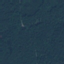

In [ ]:
import random
import numpy as np
from PIL import Image
from pathlib import Path

# Set seed
random.seed(42) # <- try changing this and see what happens

# Convert image_path to a Path object
image_path = Path(image_path)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

print((image_path_list))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
(np.asarray(img)).shape
img

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([transforms.Resize(size=(64,64)),

    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data= datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,
                                 target_transform=None
                                 )

test_data= datasets.ImageFolder(root=test_dir,
                                transform=data_transform,
                                 target_transform=None)

val_data= datasets.ImageFolder(root=val_dir,
                               transform=data_transform,
                                 target_transform=None)

train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 3623
     Root location: /content/drive/MyDrive/sat_img/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 1685
     Root location: /content/drive/MyDrive/sat_img/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
class_names=train_data.classes
class_names

['cloudy', 'desert', 'green_area', 'water']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}

In [ ]:
type(train_data[0][0])

torch.Tensor

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=False
                              )
val_dataloader = DataLoader(dataset=val_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=False
                              )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fe494504280>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe494504220>)

In [ ]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape}")
print(f"label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64])
label shape: torch.Size([32])


# **Custom**

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
train_img = "/content/drive/MyDrive/sat_img/train"

In [ ]:
target_directory = train_img
print(f"Target dir: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: /content/drive/MyDrive/sat_img/train


['cloudy', 'desert', 'green_area', 'water']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")

  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(train_img)

(['cloudy', 'desert', 'green_area', 'water'],
 {'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3})

**def load_image(self, index: int) -> Image.Image:**
    #Opens an image via a path and returns it as a NumPy array.

    def load_image(self, index: int) -> Image.Image:
      image_path = self.paths[index]
      image = cv2.imread(str(image_path))
      image = Image.fromarray(image)
      return image


Cloud class images have the shape of 256,256,4. To deal with 4(channel value), we used opencv then converted it to PIL IMAGE.

In [ ]:
# 0. Write a custom dataset class
import cv2
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it as a NumPy array."
    image_path = self.paths[index]
    image = cv2.imread(str(image_path))
    image = Image.fromarray(image)
    return image

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and label

In [ ]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),

                                      transforms.ToTensor()
])

test_transforms = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),
                                      transforms.ToTensor()
])
val_transforms = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),
                                      transforms.ToTensor()
])

In [ ]:
test_img = "/content/drive/MyDrive/sat_img/test"
val_img = "/content/drive/MyDrive/sat_img/validation"

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_img,
                                      transform=train_transforms

                                      )
test_data_custom = ImageFolderCustom(targ_dir=test_img,
                                     transform=test_transforms
                                      )
val_data_custom = ImageFolderCustom(targ_dir=val_img,
                                    transform=val_transforms
                                      )

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 16
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)
val_dataloader_custom = DataLoader(dataset=val_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fe484ab7820>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe484ab7580>)

In [ ]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)



In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([16, 3, 64, 64]), torch.Size([16]))

In [ ]:
display_random_images(test_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

NameError: ignored

In [ ]:
len(train_data), len(train_data_custom)

(3703, 3703)

In [ ]:
class_names = train_data_custom.classes

In [ ]:
len(val_data_custom)

292

In [ ]:
train_data_custom.classes

['cloudy', 'desert', 'green_area', 'water']

In [ ]:
train_data_custom.class_to_idx

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}

In [ ]:
test_data_custom.class_to_idx

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}

In [ ]:
val_data_custom.class_to_idx

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}

In [ ]:
val_data_custom

In [ ]:
train_data_custom

(-0.5, 63.5, 63.5, -0.5)

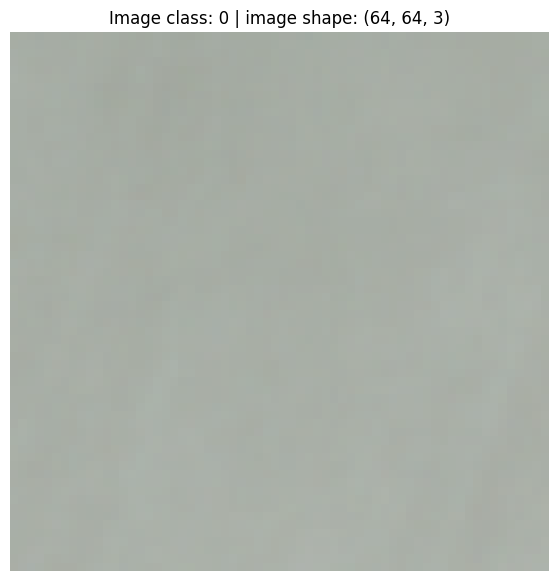

In [ ]:
img_as_array = np.asarray(train_data_custom[1][0].permute(1,2,0))

plt.figure(figsize=(10,7))
plt.imshow(img_as_array )
plt.title(f"Image class: {train_data_custom[100][1]} | image shape: {img_as_array.shape}")
plt.axis(False)

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  if n > 10:
    n = 10
    display_shape = False
    print(f"n shouldn't be more than 10")

  if seed:
    random.seed(seed)

  random_sample_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16,8))

  for i, targ_sample in enumerate(random_sample_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")

    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

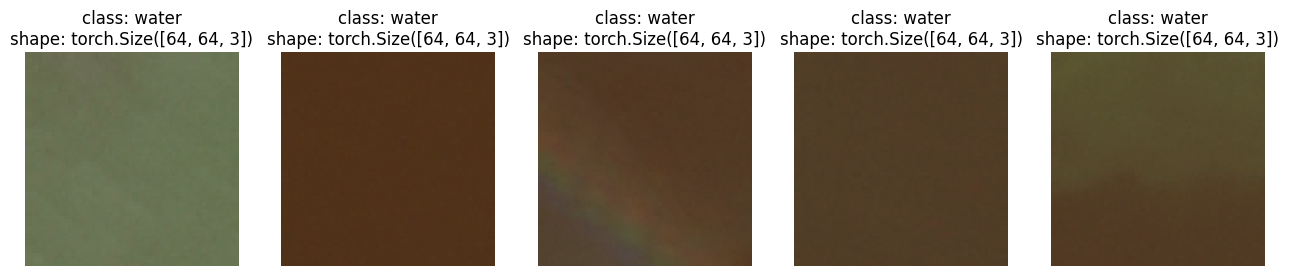

In [ ]:
import matplotlib.pyplot as plt

display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=20)

In [ ]:
from PIL import Image

# Open the image
image = Image.open('/content/drive/MyDrive/sat_img/test/cloudy/train_10177.jpg')

# Get the image shape
width, height = image.size
channels = len(image.getbands())

# Print the shape
print(f"Image shape: ({width}, {height}, {channels})")

Image shape: (256, 256, 4)


In [ ]:
import cv2

# Read the image
image = cv2.imread('/content/drive/MyDrive/sat_img/test/cloudy/train_10177.jpg')

# Get the image shape
height, width, channels = image.shape

# Print the shape
print(f"Image shape: ({width}, {height}, {channels})")

Image shape: (256, 256, 3)


In [ ]:
import cv2

# Read the image
image_path = '/content/drive/MyDrive/sat_img/test/cloudy/train_10177.jpg'
image = cv2.imread(image_path)

# Get image shape
image_height, image_width, image_channels = image.shape
print("Image shape:", image_height, "x", image_width, "x", image_channels)

# Get image data type
image_dtype = image.dtype
print("Image data type:", image_dtype)

# Get image size
image_size = image.size
print("Image size:", image_size)

# Get other metadata (e.g., color space, compression, etc.)
# OpenCV does not provide direct functions to retrieve all metadata.
# For detailed metadata, you may need to use other libraries like exifread or PIL.

Image shape: 256 x 256 x 3
Image data type: uint8
Image size: 196608


# **Train**

In [ ]:
simple_transform = transforms.Compose([
                                       transforms.Resize(size=(64, 64)),
                                       transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data_custom = ImageFolderCustom(targ_dir=train_img,
                                      transform=train_transforms

                                      )
test_data_custom = ImageFolderCustom(targ_dir=test_img,
                                      transform=train_transforms

                                      )
val_data_custom = ImageFolderCustom(targ_dir=val_img,
                                      transform=train_transforms

                                      )
# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)
val_dataloader_simple = DataLoader(dataset=val_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [ ]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion: https://horace.io/brrr_intro.html



In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=4, bias=True)
  )
)

In [ ]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[-0.0044,  0.0213,  0.0439, -0.0151],
        [-0.0053,  0.0243,  0.0439, -0.0149],
        [-0.0040,  0.0211,  0.0432, -0.0161],
        [-0.0052,  0.0233,  0.0438, -0.0148],
        [-0.0039,  0.0211,  0.0430, -0.0165],
        [-0.0046,  0.0215,  0.0438, -0.0152],
        [-0.0058,  0.0229,  0.0450, -0.0131],
        [-0.0046,  0.0221,  0.0436, -0.0152],
        [-0.0031,  0.0200,  0.0442, -0.0160],
        [-0.0061,  0.0233,  0.0449, -0.0132],
        [-0.0049,  0.0228,  0.0438, -0.0150],
        [-0.0051,  0.0231,  0.0438, -0.0149],
        [-0.0047,  0.0222,  0.0436, -0.0152],
        [-0.0050,  0.0230,  0.0438, -0.0150],
        [-0.0050,  0.0228,  0.0437, -0.0150],
        [-0.0048,  0.0229,  0.0438, -0.0150],
        [-0.0061,  0.0230,  0.0448, -0.0153],
        [-0.0044,  0.0219,  0.0435, -0.0156],
        [-0.0041,  0.0211,  0.0433, -0.0162],
        [-0.0036,  0.0205,  0.0427, -0.0168],
        [-0.0059,  0.0226,  0.0450, -0.0129],
        [-0.0052,  0.0233,  0.0438

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 4]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc



In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


In [ ]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results


In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.9025 | Train acc: 0.5445 | Test loss: 0.6439 | Test acc: 0.5814
Epoch: 1 | Train loss: 0.6159 | Train acc: 0.6771 | Test loss: 0.6684 | Test acc: 0.6688
Epoch: 2 | Train loss: 0.5047 | Train acc: 0.7355 | Test loss: 0.4376 | Test acc: 0.7649
Epoch: 3 | Train loss: 0.4384 | Train acc: 0.7989 | Test loss: 0.3987 | Test acc: 0.8113
Epoch: 4 | Train loss: 0.3439 | Train acc: 0.8643 | Test loss: 0.3736 | Test acc: 0.8617
Total training time: 68.489 seconds


In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

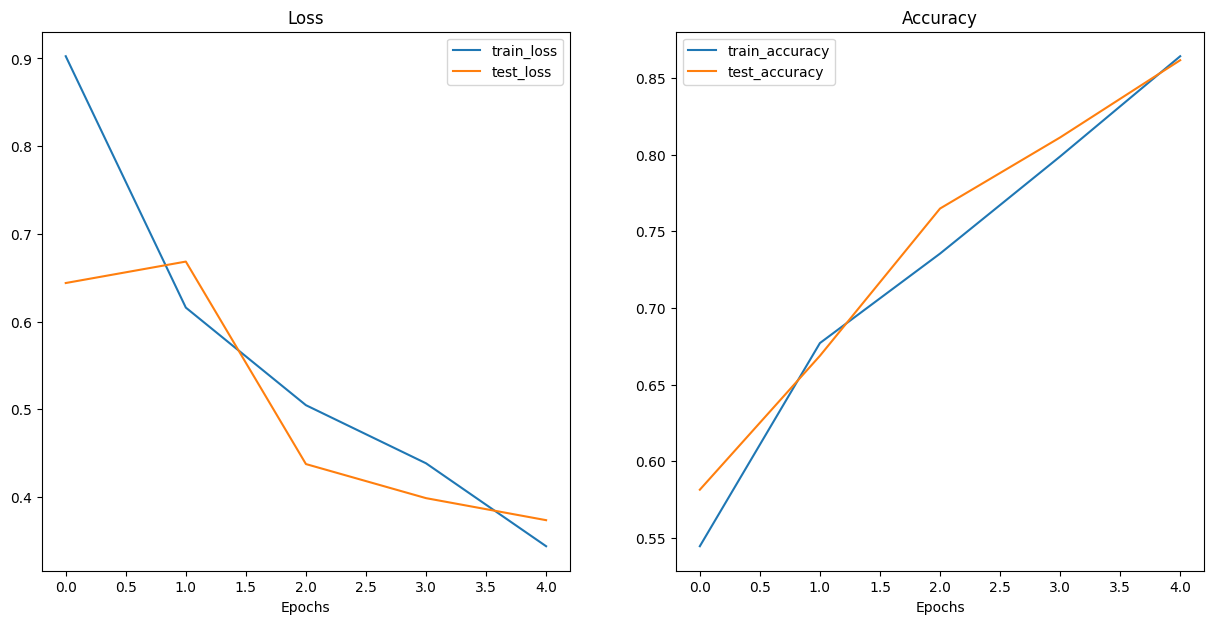

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how mnay epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


plot_loss_curves(model_0_results)


In [ ]:
custom_image_path = "/content/drive/MyDrive/sat_img/validation/desert/desert(910).jpg"

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[185, 184, 183,  ..., 181, 180, 180],
         [185, 184, 183,  ..., 178, 178, 178],
         [184, 184, 183,  ..., 179, 178, 178],
         ...,
         [180, 180, 181,  ..., 183, 184, 185],
         [180, 181, 182,  ..., 183, 183, 183],
         [180, 181, 182,  ..., 182, 181, 181]],

        [[170, 169, 168,  ..., 166, 165, 165],
         [170, 169, 168,  ..., 163, 163, 163],
         [169, 169, 168,  ..., 164, 163, 163],
         ...,
         [167, 167, 168,  ..., 168, 169, 170],
         [167, 168, 169,  ..., 168, 168, 168],
         [167, 168, 169,  ..., 167, 166, 166]],

        [[149, 148, 147,  ..., 145, 144, 144],
         [149, 148, 147,  ..., 142, 142, 142],
         [148, 148, 147,  ..., 143, 142, 142],
         ...,
         [148, 148, 149,  ..., 147, 148, 149],
         [148, 149, 150,  ..., 147, 147, 147],
         [148, 149, 150,  ..., 146, 145, 145]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 256, 256])
Custom image dataty

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device=device):
  """Makes a prediction on a target image with a trained model and plots the image and prediction."""
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255.

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  # Make sure the model is on the target device
  model.to(device)

  # Turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to the image (this is the batch dimension, e.g. our model will predict on batches of 1x image)
    target_image = target_image.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_image_pred = model(target_image.to(device)) # make sure the target image is on the right device

  # Convert logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # Convert predction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # Plot the image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dimension and rearrange shape to be HWC
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False)



In [ ]:
pred_and_plot_image(model=model_0,
                    image_path=custom_image_path,
                    class_names=class_names,

                    device=device)


RuntimeError: ignored